# Exam 3


Instructions:  This exam is not timed but you must take it in one contiguous block of time.  You are not allowed to use any of the following while taking the exam:
1. The textbook
2. another person's knowledge.
3. any code that you have authored previously.
4. the internet

Useful equations covering extrapolation/interpolation and numerical calculus can be found below.

Good Luck


## Useful Equations

### Extrapolation and Interpolation
$$y(x_1 + p h) = y_1 + p (y_2 - y_1)$$
$$y(x_2 + h) = 2 y_2 - y_1$$
$$x = x_1 - {y_1(x_2 - x_1) \over y_2 - y_1}$$
$$y(x_1 + {1\over 2} h) = {1\over 8}\left(3 y_1 + 6y_2 - y_3 \right)$$
$$y(x_2 + {1\over 2} h) = {1\over 8}\left(-y_1 + 6y_2 + 3 y_3 \right)$$
$$y(x_3 +  h) = y_1 - 3y_2 + 3y_3$$
$$y(x_3 + {1\over 2} h) = {1\over 8}\left(3 y_1 - 10y_2 + 15y_3 \right)$$

### Numerical Calculus
$$f'(x) = {f(x + h) - f(x-h)\over 2 h}$$
$$f''(x) = {f(x + h) -2 f(x) + f(x-h)\over h^2}$$

Name: Bryce Daniels
    

1. (Extrapolation and Interpolation)  In the cell below, you will find data representing the trajectory of an object launched from the top of a $50$-meter-high bluff.
    1. Plot y vs. x to see the trajectory. Set the vertical bounds of the plot to be between $0$ and $60$ meters so you can see where the ground is.
    2. Use linear extrapolation methods to estimate the location of the particle **two grid points** beyond the last point. Plot this point (with a different color) on top of the trajectory to verify that your estimate seems reasonable. 
    3. Use **quadratic** extrapolation methods to estimate the location of the particle **two grid points** beyond the last point. Plot this point (with a different color) on top of the trajectory to verify that your estimate seems reasonable.
    4. Use the zero-finding formula to approximate the landing location of the particle.  Plot this point on the plot along with the others.

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

Linear Extrapolation: 3.241 
Quadratic Extrapolation: 0.041 
Zero: 76.413


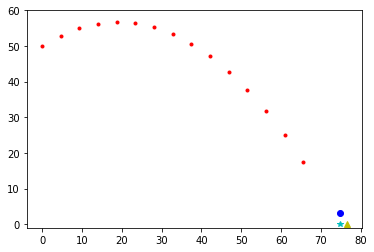

In [92]:
x = [0.0, 4.680868824508524, 9.361737649017048, 14.042606473525572, 18.723475298034096, 23.404344122542618, 28.085212947051144, 32.76608177155967, 37.44695059606819, 42.127819420576714, 46.808688245085236, 51.489557069593765, 56.17042589410229, 60.85129471861081, 65.53216354311934]
y = [50.0, 52.87757963629169, 54.95515927258338, 56.23273890887507, 56.710318545166764, 56.38789818145845, 55.265477817750146, 53.34305745404185, 50.620637090333524, 47.09821672662524, 42.775796362916914, 37.65337599920861, 31.730955635500287, 25.008535271792, 17.486114908083678]
t = [0.0, 0.2857142857142857, 0.5714285714285714, 0.8571428571428571, 1.1428571428571428, 1.4285714285714284, 1.7142857142857142, 2.0, 2.2857142857142856, 2.571428571428571, 2.8571428571428568, 3.142857142857143, 3.4285714285714284, 3.714285714285714, 4.0]
dx = x[-1]-x[-2]
plt.plot(x,y,'r.')
plt.ylim(-1,60)

linExtr = 2*y[-1]-y[-3]
plt.plot(x[-1]+2*dx, linExtr,'bo')

quadExtr = y[-5]-3*y[-3]+3*y[-1]
plt.plot(x[-1]+2*dx,quadExtr,'c*')

zero = x[-2]-y[-2]*dx/(y[-1]-y[-2])
plt.plot(zero,0,'y^')

print(f'Linear Extrapolation: {linExtr:.3f} \nQuadratic Extrapolation: {quadExtr:.3f} \nZero: {zero:.3f}')

2. (Curve Fitting) A constant force is applied to a ball as it moves horizontally through a distance of $d=12$ cm. Using a motion detector, you measure the final speed of five different balls, each with a different mass. The results are shown in the table below.

|Mass (g) | Speed (m/s)|
|---------|------------|
| 200     |    9.4     |
| 400     |    6.3     |
| 600     |    5.2     |
| 800     |    4.9     |
| 1000     |    4.0     |


From Newtonian mechanics we can derive the following relationship between the mass ($m$) of the ball and it's final velocity($v_f$):
$$
v_f = \sqrt{2F d \over m}
$$
where $F$ is the constant force applied to the balls. 

1. Plot speed (vertical axis) vs. mass (horizontal axis).  Convert the masses to kilograms first.
2. Fit a function of the form given in the equation above to this data. 
3. Plot the fit function on top of the data points to verify that the fit is good.
4. Report the value of the force applied to the balls.


The force applied to the ball is 71.133 N


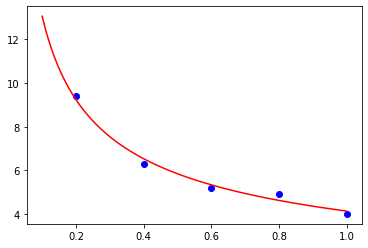

In [30]:
def velocity(mass,a):
    return np.sqrt(a/mass)

d = .12
speed = [9.4,6.3,5.2,4.9,4.0]
mass = [200,400,600,800,1000]
mass = np.array(mass)*10**-3
plt.plot(mass,speed,'bo')

params = curve_fit(velocity,mass,speed)

m = np.linspace(0.1,1,100)
v = np.sqrt(params[0][0]/m)
plt.plot(m,v,'r')

F = params[0][0]/2/d
print(f'The force applied to the ball is {F:.3f} N')

3. (Numerical Calculus) In the cell below, you will find the position components and the times for a projectile launched with an initial speed of $45$ m/s with an initial launch angle of $25^\circ$.  Perform the following:

    1. Plot x vs. time and y vs. time.
    2. Calculate the numerical derivative of x vs time and y vs. time to obtain the components of the velocity. Make separate plots for these data sets.
    3. Calculate the numerical derivative of vx vs time and vy vs. time (calculated in part 3) to obtain the components of the acceleration.  Make separate plots for these data sets.
    4. Make one figure that contains six plots: the position components on the first row, the velocity components on the second row and the acceleration components on the final row.

(-15.0, 0.0)

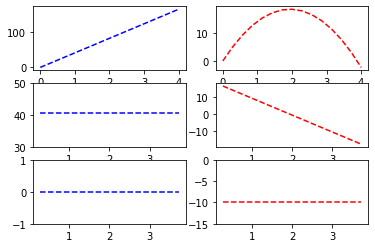

In [61]:
x = [0.0, 11.652528690471211, 23.305057380942422, 34.95758607141364, 46.610114761884844, 58.26264345235605, 69.91517214282727, 81.56770083329849, 93.22022952376969, 104.8727582142409, 116.5252869047121, 128.17781559518335, 139.83034428565455, 151.48287297612575, 163.13540166659698]
y = [0.0, 5.0336633652375635, 9.267326730475128, 12.700990095712692, 15.334653460950255, 17.16831682618782, 18.201980191425385, 18.435643556662946, 17.86930692190051, 16.502970287138076, 14.336633652375639, 11.370297017613204, 7.603960382850765, 3.037623748088336, -2.3287128866741114]
t = [0.0, 0.2857142857142857, 0.5714285714285714, 0.8571428571428571, 1.1428571428571428, 1.4285714285714284, 1.7142857142857142, 2.0, 2.2857142857142856, 2.571428571428571, 2.8571428571428568, 3.142857142857143, 3.4285714285714284, 3.714285714285714, 4.0]
x=np.array(x)
y = np.array(y)
t = np.array(t)
dt = t[-1]-t[-2]

vx = (x[2:]-x[:-2])/2/dt
vy = (y[2:]-y[:-2])/2/dt

ax = (x[2:]-2*x[1:-1]+x[:-2])/dt**2
ay = (y[2:]-2*y[1:-1]+y[:-2])/dt**2

fig = plt.figure()
ax1 = fig.add_subplot(3,2,1)
ax1.plot(t,x,'b--')

ax2 = fig.add_subplot(3,2,2)
ax2.plot(t,y,'r--')

ax3 = fig.add_subplot(3,2,3)
ax3.plot(t[1:-1],vx,'b--')
ax3.set_ylim(30,50)

ax4 = fig.add_subplot(3,2,4)
ax4.plot(t[1:-1],vy,'r--')

ax5 = fig.add_subplot(3,2,5)
ax5.plot(t[1:-1],ax,'b--')
ax5.set_ylim(-1,1)

ax6 = fig.add_subplot(3,2,6)
ax6.plot(t[1:-1],ay,'r--')
ax6.set_ylim(-15,0)


4. (Euler's Method) A cannon shell with radius $r = 5$ cm and mass $m = 6$ kg is launched on level ground with an initial speed of $700$ m/s and a launch angle of $35^\circ$.  Including air drag, the components of the acceleration experienced by the cannon shell are
$$
ax = - {1\over 2 m} \rho A C |v| v_x
$$
$$
ay = -g - {1\over 2 m} \rho A C |v| v_y
$$
with $g = 9.8$ m/s$^2$, $A$ is the cross-sectional area of the shell ($A = \pi r^2$), and $C = 0.05$ is the drag constant.  Due to its large initial speed, the projectile will achieve a rather large maximum altitude (in the kilometers range) and the density ($\rho$) of the atmosphere can change significantly over the course of the trajectory.  One function for approximating the variation in density is given by $$ \rho(h) = 1.23 \cdot e^{-h\over 1.0 \times 10^4}\text{ (isothermal approximation)}$$  This is called the isothermal approximation. Another possible choice, called the adiabatic approximation, is given by $$\rho(h) = 1.23 (1 - {a h \over T_0})^{2.5}  \text{ (adiabatic approximation)}$$ where $a = .0065$ and $T_0 = 294$ K.  
    
    1. Calculate the trajectory (y vs. x) of the cannon shell for both the isothermal and adiabatic approximations.  Plot both trajectories on the same plot and add labels to the plot so it is clear which trajectory corresponds to which approximation.
    2. Now plot the trajectory that would result if you neglected air drag completely.  Once again, plot this trajectory on top of the two from the first part.  Is drag a negligible effect in this case? What max speed could you launch the cannon shell with and feel comfortable neglecting air drag?
    3. Using trial and error, determine what launch angle produces the max range of the projectile under the adiabatic approximation.

It went 1187.965 m


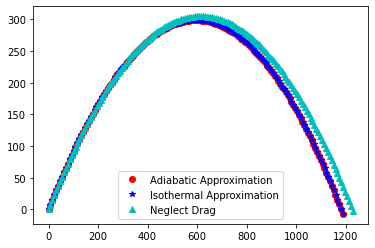

In [93]:
def adiabat(h,a=0.0065,T = 294):
    return 1.23*(1-a*h/T)**2.5
def isotherm(h):
    return 1.23*np.exp(-h/1e4)
vel = lambda vx,vy: np.sqrt(vx**2 + vy**2)

#Constants
r = 5e-2
m = 6
v = 110
θ = 45 * np.pi/180
g = 9.8
a = 0.0065
To = 294
C = 0.05
A = np.pi*r**2
dt = .1




# ADIABATIC
#Initial
x = [0]
y = [0]
t = [0]
vx = v*np.cos(θ)
vy = v*np.sin(θ)

while y[-1] >=0 :
    ρ = adiabat(y[-1])
    ax = -1/2/m * ρ * A * C * abs(vel(vx,vy)) * vx
    ay = -g - 1/2/m * ρ * A * C * abs(vel(vx,vy)) * vy
    vx += ax*dt
    vy += ay*dt
    x.append(x[-1]+vx*dt)
    y.append(y[-1]+vy*dt)
    t.append(t[-1]+dt)
    
plt.plot(x,y,'ro',label= 'Adiabatic Approximation')
print(f'It went {x[-1]:.3f} m')






# ISOTHERMAL
#Initial
x = [0]
y = [0]
t = [0]
vx = v*np.cos(θ)
vy = v*np.sin(θ)

while y[-1] >=0 :
    ρ = isotherm(y[-1])
    ax = -1/2/m * ρ * A * C * abs(vel(vx,vy)) * vx
    ay = -g - 1/2/m * ρ * A * C * abs(vel(vx,vy)) * vy
    vx += ax*dt
    vy += ay*dt
    x.append(x[-1]+vx*dt)
    y.append(y[-1]+vy*dt)
    t.append(t[-1]+dt)
plt.plot(x,y,'b*',label= 'Isothermal Approximation')






# NO DRAG
C = 0
#Initial
x = [0]
y = [0]
t = [0]
vx = v*np.cos(θ)
vy = v*np.sin(θ)


while y[-1] >=0 :
    ρ = adiabat(y[-1])
    ax = -1/2/m * ρ * A * C * abs(vel(vx,vy)) * vx
    ay = -g - 1/2/m * ρ * A * C * abs(vel(vx,vy)) * vy
    vx += ax*dt
    vy += ay*dt
    x.append(x[-1]+vx*dt)
    y.append(y[-1]+vy*dt)
    t.append(t[-1]+dt)
plt.plot(x,y,'c^',label= 'Neglect Drag')

plt.legend()
plt.show()

### Drag is very important in this similation. I would be comfortable neglecting drag when v < 100 m/s
### The distance is optimized at 45 degrees

5. (Root Finding) The function below has three zeros in the region $-2 < x < 5$. Use Newton's method to find all three of them:
$$ y(x) = 2^x - x^2 = 0 $$
The derivative of this function is
$$ y'(x) = 2^x\log(2) - 2x$$

In [91]:
y = lambda x: 2**x - x**2
yp = lambda x: 2**x * np.log(2)-2*x 
x1 = -2
while abs(y(x1)) > 1e-4:
    x1 = x1 - y(x1)/yp(x1)
print(x1)
x2 = 1
while abs(y(x2)) > 1e-4:
    x2 = x2 - y(x2)/yp(x2)
print(x2)
x3 = 5
while abs(y(x3)) > 1e-4:
    x3 = x3 - y(x3)/yp(x3)
print(x3)

-0.7666648840924213
2.000000035665033
4.000000007319207
